In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

#importing StandardScaler
from sklearn.preprocessing import StandardScaler

import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_absolute_error, mean_squared_error, classification_report

In [4]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
# counting values of variables in 'diagnosis'
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


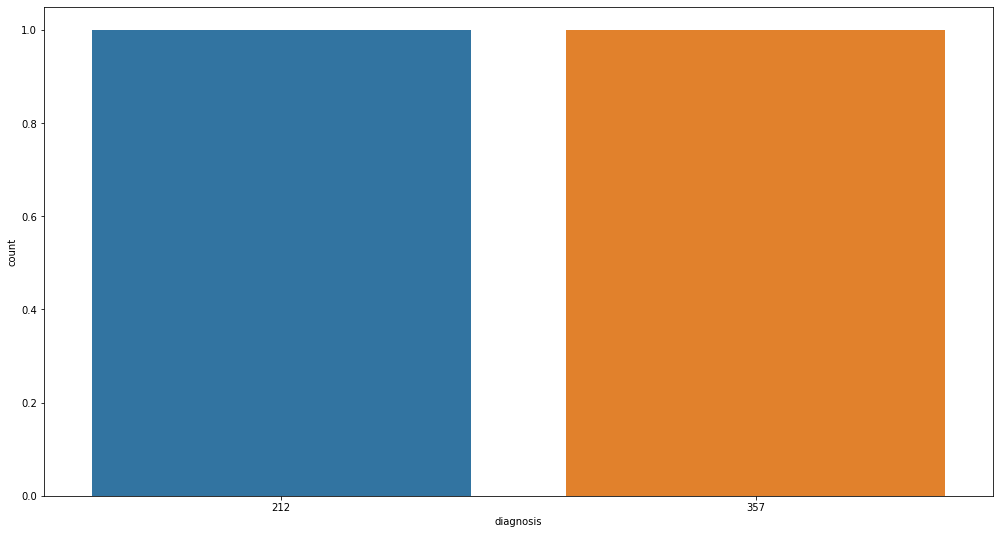

In [6]:
plt.figure(figsize=[17,9])
sns.countplot(data['diagnosis'].value_counts())
plt.show()

In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#droping feature / column
data.drop(['Unnamed: 32','id'], axis=1,inplace=True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


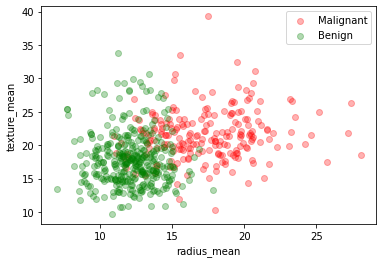

In [9]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="Malignant", alpha= 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="Benign", alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

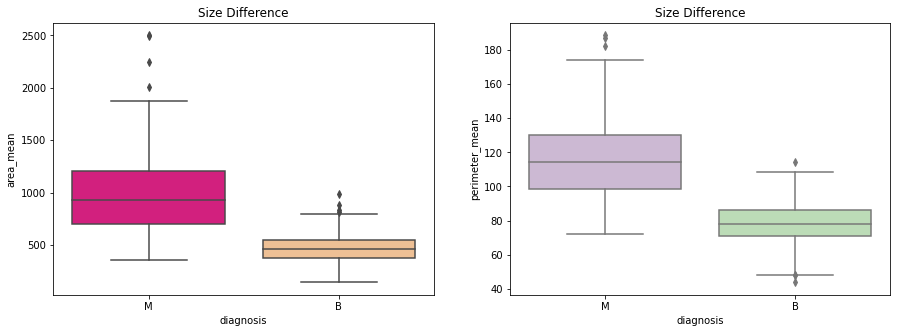

In [10]:
# Box plot
fig, axes =  plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = data.diagnosis, y = data['area_mean'] , palette = "Accent_r")
axes[0].set_title('Size Difference')

sns.boxplot(ax = axes[1], x = data.diagnosis, y = data['perimeter_mean'] ,palette="PRGn")
axes[1].set_title('Size Difference')

plt.show()

In [11]:
# independent variables
x = data.drop('diagnosis',axis=1)
#dependent variables // labels
y = data.diagnosis

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
train_data,  test_data, train_label, test_label = train_test_split(x, y, test_size=0.3, random_state=40)

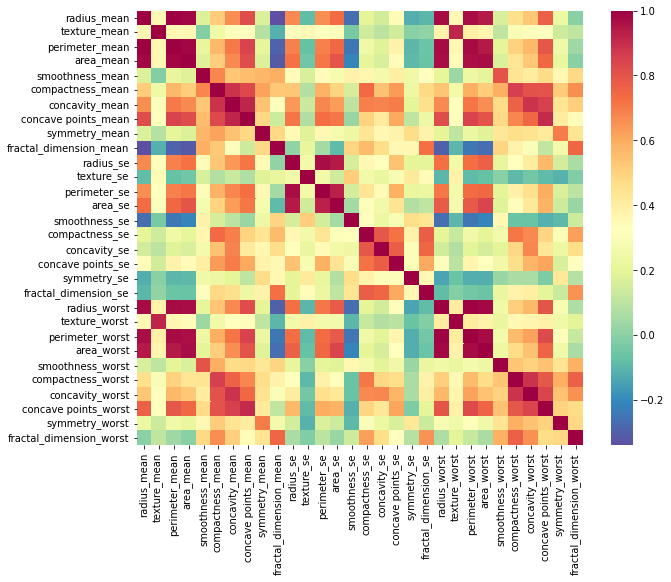

In [14]:
fig =  plt.subplots(1, 1, figsize=(10,8))
grp = sns.heatmap(train_data.corr(),cmap="Spectral_r",annot = False)

In [15]:
# scaling the data
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.transform(test_data)

In [16]:
#creating Kera Sequential model

classifier = Sequential()

#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#taking summary of layers
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 279       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#fitting the ANN to the training set
model = classifier.fit(train_data, train_label, batch_size = 100, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 1.1186 - accuracy: 0.4874
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0526 - accuracy: 0.5101
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9958 - accuracy: 0.5327
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9391 - accuracy: 0.5653
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8893 - accuracy: 0.5779
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8449 - accuracy: 0.6005
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8038 - accuracy: 0.6357
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7647 - accuracy: 0.6307
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7269 - accuracy: 0.6508
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.6633
Epoch 11/50
4/4 [======================

In [19]:
y_pred = classifier.predict(test_data)
y_pred = (y_pred>0.5)

cm = confusion_matrix(test_label, y_pred)
score = accuracy_score(test_label,y_pred)
print(cm)
print('score ater 50 epochs: ', score*100)

[[111   4]
 [  1  55]]
score ater 50 epochs:  97.07602339181285


In [20]:
#fitting the ANN to the training set
model = classifier.fit(train_data, train_label, batch_size = 100, epochs = 50)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9673
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9698
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1233 - accuracy: 0.9698
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9724
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.9724
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9724
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1140 - accuracy: 0.9724
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.9724
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 0.9724
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9724
Epoch 11/50
4/4 [======================

In [21]:
y_pred = classifier.predict(test_data)
y_pred = (y_pred>0.5)

cm = confusion_matrix(test_label, y_pred)
score = accuracy_score(test_label,y_pred)
print(cm)
print('score ater 100 epochs: ', score*100)

[[114   1]
 [  1  55]]
score ater 100 epochs:  98.83040935672514


In [22]:
#fitting the ANN to the training set
model = classifier.fit(train_data, train_label, batch_size = 100, epochs = 50)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9774
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9774
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9774
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9774
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9774
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9774
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9774
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9774
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9774
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9774
Epoch 11/50
4/4 [======================

In [23]:
y_pred = classifier.predict(test_data)
y_pred = (y_pred>0.5)

cm = confusion_matrix(test_label, y_pred)
score = accuracy_score(test_label,y_pred)
print(cm)
print('score ater 150 epochs: ', score*100)

[[114   1]
 [  1  55]]
score ater 150 epochs:  98.83040935672514


In [24]:
#now testing for Test data
y_pred = classifier.predict(test_data)

In [25]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [26]:
cm = confusion_matrix(test_label, y_pred)
ANN_score = accuracy_score(test_label,y_pred)
report = classification_report(test_label, y_pred)

print(cm)     # tp, fn, fp, tn
print('score is:', ANN_score*100) 
print('\nClassification report : \n', report)

[[114   1]
 [  1  55]]
score is: 98.83040935672514

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       115
           1       0.98      0.98      0.98        56

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



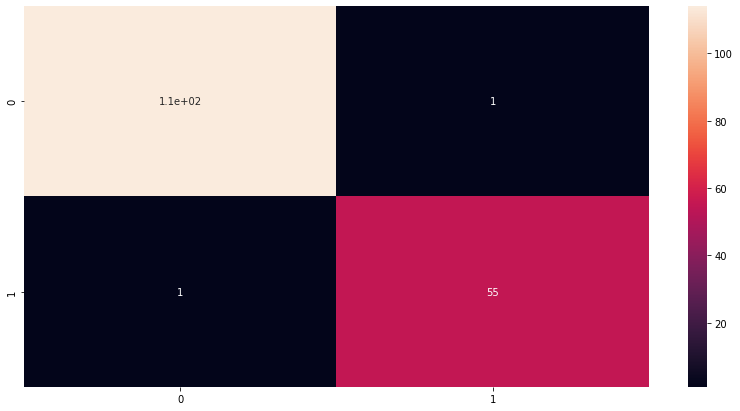

In [27]:
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


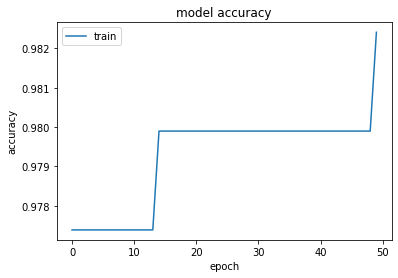

In [28]:
# list all data in history
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

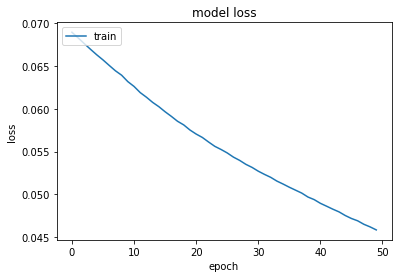

In [29]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Decision Tree Classifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth= 3 , min_samples_leaf=12)

tree_model.fit(train_data, train_label)

acc = tree_model.score(train_data, train_label)    
print("Train dataset Accuracy is ", acc*100)

acc = tree_model.score(test_data, test_label)    
print("Test dataset Accuracy is ", acc*100)

y_pred = tree_model.predict(test_data)

tree_acc = accuracy_score(test_label, y_pred)    
print("Accuracy ", tree_acc*100)


Train dataset Accuracy is  94.72361809045226
Test dataset Accuracy is  89.47368421052632
Accuracy  89.47368421052632


**Model Evaluation**

In [31]:
# Model Evaluation
print('R^2:', r2_score(test_label, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(test_label, y_pred))*(len(test_label)-1)/(len(test_label)-test_data.shape[1]-1))
print('MAE:', mean_absolute_error(test_label, y_pred))
print('MSE:', mean_squared_error(test_label, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(test_label, y_pred)))

R^2: 0.5220496894409938
Adjusted R^2: 0.41963176574977823
MAE: 0.10526315789473684
MSE: 0.10526315789473684
RMSE: 0.3244428422615251


# **Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(train_data, train_label)

acc = rf_model.score(train_data, train_label)    
print("Train dataset accuracy is", acc*100)

acc = rf_model.score(test_data, test_label)    
print("Test dataset accuracy is", acc*100)

y_pred = rf_model.predict(test_data)

rf_acc = accuracy_score(test_label, y_pred)    
print("Accuracy is", rf_acc*100)

Train dataset accuracy is 100.0
Test dataset accuracy is 97.07602339181285
Accuracy is 97.07602339181285


**Model Evaluation**

In [33]:
print('R^2:', r2_score(test_label, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(test_label, y_pred))*(len(test_label)-1)/(len(test_label)-test_data.shape[1]-1))
print('MAE:', mean_absolute_error(test_label, y_pred))
print('MSE:', mean_squared_error(test_label, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(test_label, y_pred)))

R^2: 0.8672360248447205
Adjusted R^2: 0.8387866015971606
MAE: 0.029239766081871343
MSE: 0.029239766081871343
RMSE: 0.17099639201419234


# **K-Neighbors Classifier**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(3)

knn_model.fit(train_data, train_label)

acc = knn_model.score(train_data, train_label)    
print("Train dataset Accuracy is", acc*100)

acc = knn_model.score(test_data, test_label)    
print("Test dataset Accuracy is", acc*100)

y_pred = knn_model.predict(test_data)

knn_acc = accuracy_score(test_label, y_pred)    
print("Accuracy is", knn_acc*100)

Train dataset Accuracy is 98.49246231155779
Test dataset Accuracy is 96.49122807017544
Accuracy is 96.49122807017544


**Model Evaluation**

In [35]:
print('R^2:', r2_score(test_label, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(test_label, y_pred))*(len(test_label)-1)/(len(test_label)-test_data.shape[1]-1))
print('MAE:', mean_absolute_error(test_label, y_pred))
print('MSE:', mean_squared_error(test_label, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(test_label, y_pred)))

R^2: 0.8406832298136646
Adjusted R^2: 0.8065439219165927
MAE: 0.03508771929824561
MSE: 0.03508771929824561
RMSE: 0.1873171623163388


# **Support Vector Machine**

In [56]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=1)

svm_model.fit(train_data, train_label)

acc = svm_model.score(train_data, train_label)    
print("Train dataset Accuracy is", acc*100)

acc = svm_model.score(test_data, test_label)    
print("Test dataset Accuracy is", acc*100)

y_pred = svm_model.predict(test_data)

svm_acc = accuracy_score(test_label, y_pred)    
print("Accuracy is", svm_acc*100)

Train dataset Accuracy is 98.99497487437185
Test dataset Accuracy is 98.83040935672514
Accuracy is 98.83040935672514


**Model Evaluation**

In [37]:
print('R^2:', r2_score(test_label, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(test_label, y_pred))*(len(test_label)-1)/(len(test_label)-test_data.shape[1]-1))
print('MAE:', mean_absolute_error(test_label, y_pred))
print('MSE:', mean_squared_error(test_label, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(test_label, y_pred)))

R^2: 0.9468944099378882
Adjusted R^2: 0.9355146406388642
MAE: 0.011695906432748537
MSE: 0.011695906432748537
RMSE: 0.10814761408717502


# **AdaBoostClassifier**

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

ada_model.fit(train_data, train_label)

acc = ada_model.score(train_data, train_label)    
print("Train dataset Accuracy is", acc*100)

acc = ada_model.score(test_data, test_label)    
print("Test dataset Accuracy is", acc*100)

y_pred = ada_model.predict(test_data)

ada_acc = accuracy_score(test_label, y_pred)    
print("Accuracy is", ada_acc*100)

Train dataset Accuracy is 100.0
Test dataset Accuracy is 97.07602339181285
Accuracy is 97.07602339181285


In [39]:
# Model Evaluation
print('R^2:', r2_score(test_label, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(test_label, y_pred))*(len(test_label)-1)/(len(test_label)-test_data.shape[1]-1))
print('MAE:', mean_absolute_error(test_label, y_pred))
print('MSE:', mean_squared_error(test_label, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(test_label, y_pred)))

R^2: 0.8672360248447205
Adjusted R^2: 0.8387866015971606
MAE: 0.029239766081871343
MSE: 0.029239766081871343
RMSE: 0.17099639201419234


# **Bagging Classifier**

In [40]:
from sklearn.ensemble import BaggingClassifier

bgc_model = BaggingClassifier(base_estimator=SVC(),
                       n_estimators=10, random_state=0)

bgc_model.fit(train_data, train_label)

acc = bgc_model.score(train_data, train_label)    
print("Train dataset Accuracy is", acc*100)

acc = bgc_model.score(test_data, test_label)    
print("Test dataset Accuracy is", acc*100)

y_pred = bgc_model.predict(test_data)

bgc_acc = accuracy_score(test_label, y_pred)    
print("Accuracy is", bgc_acc*100)

Train dataset Accuracy is 98.49246231155779
Test dataset Accuracy is 99.41520467836257
Accuracy is 99.41520467836257


In [41]:
# Model Evaluation
print('R^2:', r2_score(test_label, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(test_label, y_pred))*(len(test_label)-1)/(len(test_label)-test_data.shape[1]-1))
print('MAE:', mean_absolute_error(test_label, y_pred))
print('MSE:', mean_squared_error(test_label, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(test_label, y_pred)))

R^2: 0.9734472049689441
Adjusted R^2: 0.9677573203194321
MAE: 0.005847953216374269
MSE: 0.005847953216374269
RMSE: 0.07647191129018725


In [42]:
scores = {"ANN" : ANN_score,"Decision Tree Classifier" : tree_acc, "K-Neighbors Classifier" : knn_acc,
          "Random Forest Classifier" : rf_acc, "Support Vector Machine" : svm_acc, "Bagging Classifier" : bgc_acc, 
          "Ada Boost Classifier" : ada_acc}
          
df = pd.DataFrame(list(scores.items()),columns = ['Models','Accuracy scores']) 
df

,Models,Accuracy scores
0,ANN,0.988304
1,Decision Tree Classifier,0.894737
2,K-Neighbors Classifier,0.964912
3,Random Forest Classifier,0.970760
4,Support Vector Machine,0.988304
5,Bagging Classifier,0.994152
6,Ada Boost Classifier,0.970760


In [43]:
df.sort_values(by= 'Accuracy scores', ascending= False)

,Models,Accuracy scores
5,Bagging Classifier,0.994152
0,ANN,0.988304
4,Support Vector Machine,0.988304
3,Random Forest Classifier,0.970760
6,Ada Boost Classifier,0.970760
2,K-Neighbors Classifier,0.964912
1,Decision Tree Classifier,0.894737


### **ANN model has higher accuracy than machine models**

# **AUC_ROC Curve**

In [57]:
# predict probabilities
pred_prob1 = rf_model.predict_proba(test_data)
pred_prob2 = knn_model.predict_proba(test_data)
pred_prob3 = svm_model.predict_proba(test_data)
pred_prob4 = ada_model.predict_proba(test_data)
pred_prob5 = tree_model.predict_proba(test_data)
pred_prob6 = bgc_model.predict_proba(test_data)

In [61]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_label, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_label, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(test_label, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(test_label, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(test_label, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(test_label, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_label))]
p_fpr, p_tpr, _ = roc_curve(test_label, random_probs, pos_label=1)

In [64]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_label, pred_prob1[:,1])
auc_score2 = roc_auc_score(test_label, pred_prob2[:,1])
auc_score3 = roc_auc_score(test_label, pred_prob3[:,1])
auc_score4 = roc_auc_score(test_label, pred_prob4[:,1])
auc_score5 = roc_auc_score(test_label, pred_prob5[:,1])
auc_score6 = roc_auc_score(test_label, pred_prob6[:,1])

print("AUC score for Random Forest Classifier ", auc_score1)
print("AUC score for K Neighbors Classifier ", auc_score2)
print("AUC score for SVM Classifier ", auc_score3)
print("AUC score for Ada Boost Classifier ", auc_score4)
print("AUC score for Decision Tree Classifier ", auc_score5)
print("AUC score for Bagging Classifier ", auc_score6)

AUC score for Random Forest Classifier  0.9835403726708074
AUC score for K Neighbors Classifier  0.9798136645962734
AUC score for SVM Classifier  0.9975155279503106
AUC score for Ada Boost Classifier  0.9923913043478261
AUC score for Decision Tree Classifier  0.9465062111801242
AUC score for Bagging Classifier  0.9906832298136646


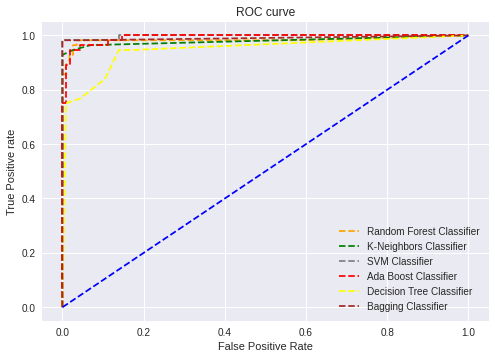

In [65]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='K-Neighbors Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='grey', label='SVM Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Ada Boost Classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Decision Tree Classifier')
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='Bagging Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();